# DSI Project 2 - Ames Housing Price Prediction via Regression

---

# Problem Statement

A real estate company in Ames, Iowa wants create an interactive webpage where potential clients could get a rough estimate of the sale price a house by entering a set of parameters.


The company is requesting for a linear regression model based on the Ames Housing Dataset that will predict the rough price of a house at sale, with no more than 25 features.


As a requirement, the company has set up a Kaggle competition, and requested that scores be submitted there as a measure of accuracy.

# Executive Summary

The Ames dataset consists of 2051 rows with 81 Columns, with a mix of Nominal, Ordinal and Scalar data. A data dictionary was provided along with the dataset to better explain the categoriacal variables. 

These set of notebooks aim to create a workable linear regression production model for the prediction of housing sale prices with 25 selected features.

Exploratory Data Analysis was done, revealing that some columns of the dataset contained high skews, missing values and errors. Further examiation revealed the presense of several colinear features. These factors were sense-made of and handled during data cleaning, and factor selection was performed.

The model was successfully built, but suffers from the limits imposed on the task (only linear regression, 25 features). The test scores designated by the company also exhibit discrepancies, and should be further examined.


# Part 1 - Exploratory Data Analysis

### Contents

Part 1 - Exploratory Data Analysis

- [Importing and Basic Data Cleaning](#Importing-and-Basic-Data-Cleaning)


- [Basic Data Exploration](#Basic-Data-Exploration)
    - [Initial Impressions](#Initial-Impressions)
	- [Shape and Descriptives](#Shape-and-Descriptives)
	- [Skewness](#Skewness)
	- [Null and Zero Values](#Null-and-Zero-Values)


- [Processing for Visualization](#Processing-for-Visualisation)
	- [Error Correction](#Error-Correction)
	- [Custom Functions](#Custom-Functions)
	- [Creating Lists of Columns for Different Data Types](#Creating-Lists-of-Columns-for-Different-Data-Types)
	- [Filling Null Values for Visualization](#Filling-Null-Values-For-Visualization)
	- [Encoding Ordinal Data](#Encoding-Ordinal-Data)


- [Visualisation](#Visualisations)
	- [Numerical Data](#Numerical-Data)
	- [Nominal Data](#Nominal-Data)
	- [Ordinal Data](#Ordinal-Data)
	- [Collinearity](#Collinearity)
    
    
- [Final Comments](#Final-Comments)
    
<a href = "part-2_data_cleaning.ipynb">Part 2 - Data Cleaning</a><br>

<a href = "part-3_production_model_building.ipynb">Part 3 - Production Model Building</a><br>

---


#### Importing and Basic Data Cleaning
[top](#Contents)

In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# pandas settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# seaborn settings
sns.set_style("whitegrid")

In [2]:
# importing dataset

train = ("datasets/train.csv")

ames_train = pd.read_csv(train)

In [3]:
# Titles contain a mix of uppercase and lowercase and spaces 

# Replacing spaces with underscores and converting all to lowercase.

def edit_title (title):
    
    title = (title.replace(" ","_")).lower()
    
    return title

ames_train.rename(columns = lambda i:edit_title(i), inplace = True)

In [4]:
# 3 column names start with numbers. Replacing numbers with strings.

ames_train.rename(columns = {'1st_flr_sf':"first_flr_sf",  '2nd_flr_sf':'second_flr_sf',"3ssn_porch":"threessn_porch"}, inplace = True)

In [5]:
# Assumption is that IDs and and PIDs should be unique

# Listing duplicates in IDs 
    
if sum(ames_train['id'].duplicated()) == 0:
    print ("No duplicates in ID")
else:
    print ("There are duplicate IDs somewhere!")

# Listing duplicates in PIDs    
    
if sum(ames_train['pid'].duplicated()) == 0:
    print ("No duplicates in PID")
else:
    print ("There are duplicates PIDs somewhere!")

No duplicates in ID
No duplicates in PID


---

## Basic Data Exploration
[top](#Contents)

---
### Initial Impressions

#### Descriptives
- The dataset consists of 2051 rows and 81 columns. 

- Several of the columns have extreme outliers.

- Several of the descriptors also have highly skewed datasets (e.g. Enclosed Porch ). These columns could probably be further simplified for easier analysis, or removed if the values are not significant.

- Some of the datatypes are incorrect, e.g. "year" was encoded as strings.

- There is an obvious error in that the max year for the garage built column is shown as 2207. This should be fixed before features examination.


#### Null Counts
- There are 28 columns with null values. 

- In some cases, this can be attributed to the item that the column is describing (e.g. null values in Pool QC could correspond to the house lacking a pool). 

- Some of the columns have significant null counts. These columns will have to be further examined

#### "0" Counts
- There are 23 columns with "0" values. 

- With some columns, this can be attributed to the house lacking the feature (e.g. a house with no pool would have 0 pool_area.

- As with null counts, some columns have significant "0" counts. These columns will have to be further examined.


#### Encoding
- As there are categorical values in the dataset, some processing will have to be done on both the nominal and ordinal data before further analysis.
---

#### Shape and Descriptives

In [6]:
ames_train.shape

(2051, 81)

In [7]:
ames_train.dtypes

id                   int64
pid                  int64
ms_subclass          int64
ms_zoning           object
lot_frontage       float64
lot_area             int64
street              object
alley               object
lot_shape           object
land_contour        object
utilities           object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
overall_qual         int64
overall_cond         int64
year_built           int64
year_remod/add       int64
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area       float64
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_sf_1       float64
bsmtfin_type_2      object
b

In [8]:
ames_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,threessn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


#### Skewness

In [9]:
skew_frame = ames_train.skew().to_frame("skew")
skew_frame = skew_frame[(skew_frame["skew"]>1) | (skew_frame["skew"] < -1)]

skew_frame.sort_values(["skew"], ascending = False).head(10)

,skew
misc_val,20.657398
pool_area,16.700228
threessn_porch,11.827201
low_qual_fin_sf,11.501289
lot_area,9.204950
kitchen_abvgr,4.348274
bsmtfin_sf_2,4.239955
bsmt_half_bath,3.946994
screen_porch,3.859110
enclosed_porch,2.864913


#### Null and Zero Values

In [10]:
ames_train.isnull().sum().sort_values(ascending = False)


pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_finish       114
garage_cond         114
garage_qual         114
garage_yr_blt       114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmtfin_type_1       55
bsmt_cond            55
bsmt_qual            55
mas_vnr_type         22
mas_vnr_area         22
bsmt_half_bath        2
bsmt_full_bath        2
garage_cars           1
garage_area           1
bsmt_unf_sf           1
bsmtfin_sf_2          1
total_bsmt_sf         1
bsmtfin_sf_1          1
overall_cond          0
exterior_2nd          0
exterior_1st          0
roof_matl             0
roof_style            0
year_remod/add        0
year_built            0
saleprice             0
overall_qual          0
land_contour          0
pid                   0
ms_subclass           0
ms_zoning             0
lot_area              0
street                0
lot_shape       

In [11]:
ames_train.isin([0]).sum(axis=0).sort_values(ascending = False)

pool_area          2042
threessn_porch     2025
low_qual_fin_sf    2018
misc_val           1986
bsmt_half_bath     1923
screen_porch       1870
bsmtfin_sf_2       1803
enclosed_porch     1724
half_bath          1308
mas_vnr_area       1216
bsmt_full_bath     1200
second_flr_sf      1191
wood_deck_sf       1075
fireplaces         1000
open_porch_sf       912
bsmtfin_sf_1        657
bsmt_unf_sf         165
garage_area         113
garage_cars         113
total_bsmt_sf        54
full_bath             8
bedroom_abvgr         5
kitchen_abvgr         2
year_remod/add        0
year_built            0
exterior_1st          0
roof_matl             0
overall_qual          0
house_style           0
roof_style            0
exterior_2nd          0
mas_vnr_type          0
overall_cond          0
saleprice             0
bldg_type             0
alley                 0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage          0
lot_area              0
street          

---

## Processing for Visualisation
[top](#Contents)

#### Error Correction

In [12]:
# showing errors in the "year" columns

check1 = ames_train[(ames_train["garage_yr_blt"] < ames_train["year_built"]) | (ames_train["garage_yr_blt"] > ames_train["yr_sold"])]
check2 = ames_train[(ames_train["year_remod/add"] < ames_train["year_built"]) | (ames_train["year_remod/add"] > ames_train["yr_sold"]) ]    
check3 = ames_train[(ames_train["year_built"] > ames_train["yr_sold"])]  

display(check1)
display(check2)
display(check3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,threessn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
72,2613,535403150,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,655.0,Unf,0.0,0.0,655.0,GasA,Ex,Y,SBrkr,1194,0,0,1194,0.0,1.0,1,0,3,1,TA,6,Typ,1,Fa,BuiltIn,1954.0,Fin,2.0,539.0,TA,TA,Y,0,0,192,0,0,0,NaN,NaN,NaN,0,7,2006,WD,159500
77,1350,903235100,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,520.0,520.0,GasA,Fa,N,SBrkr,520,0,0,520,0.0,0.0,1,0,1,1,Fa,4,Typ,0,NaN,Detchd,1920.0,Unf,1.0,240.0,Fa,TA,Y,49,0,87,0,0,0,NaN,NaN,NaN,0,5,2008,WD,68500
336,694,902103100,50,RM,68.0,4080,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,6,8,1935,1998,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,901.0,901.0,GasA,Gd,Y,SBrkr,861,517,0,1378,0.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1920.0,Unf,1.0,162.0,Fa,Fa,P,54,0,40,0,0,0,NaN,NaN,NaN,0,6,2009,WD,128900
493,911,909250080,70,RL,43.0,5707,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,2Story,6,6,1935,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,583.0,583.0,GasA,Gd,Y,FuseF,647,595,0,1242,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Detchd,1926.0,Unf,1.0,180.0,Fa,TA,Y,329,96,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,105000
533,904,909101100,50,RL,45.0,8212,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,626.0,Unf,0.0,94.0,720.0,GasA,Ex,Y,SBrkr,854,444,0,1298,0.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Detchd,1940.0,Unf,1.0,256.0,TA,TA,Y,84,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,122000
902,2110,906382060,20,RL,73.0,8760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,36.0,Unf,0.0,1453.0,1489.0,GasA,Ex,Y,SBrkr,1500,0,0,1500,0.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,RFn,2.0,674.0,TA,TA,Y,144,38,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,212999
1076,1352,903400180,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,2000,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,833.0,833.0,GasA,Gd,Y,SBrkr,1053,795,0,1848,0.0,0.0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,1922.0,Unf,2.0,370.0,TA,TA,N,0,0,0,0,220,0,NaN,NaN,NaN,0,6,2008,WD,207000
1686,2627,535454060,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,Stucco,Stone,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,93500
1699,2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,13

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,threessn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1003,851,907194160,20,RL,65.0,10739,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,144,40,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,203000
1719,1703,528120010,60,RL,134.0,16659,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,2007.0,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,260116
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,first_flr_sf,second_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,threessn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [13]:
# Correcting for errors

for i in check3.index:
    ames_train.at[i, "year_built"] = ames_train.at[i, "yr_sold"]

for i in check1.index:
    ames_train.at[i, "garage_yr_blt"] = ames_train.at[i, "year_built"]
    
for i in check2.index:
    ames_train.at[i, "year_remod/add"] = ames_train.at[i, "year_built"]
    
# manually correcting the remaining row

ames_train.at[1885, "yr_sold"] = 2008

# filling empty garage_yr_blt with year_built

ames_train["garage_yr_blt"].fillna(ames_train["year_built"], inplace = True)


In [14]:
# For further examination, IDs and PIDs do not contain useful data.
# the misc_feature and misc_val columns are too random in nature to contain any useful data.
# dropping columns.

ames_train.drop(columns = ["id", "pid", "misc_feature", "misc_val"], inplace=True)

#### Custom Functions

In [15]:
# custom regplot function

def regplot_custom(dataframe, list_of_columns, target, x = False, y = False):

    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(17, nrows*5), sharex = x, sharey = y) 
    
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        
        # Creating the seaborn regplots
        
        sns.regplot(data = dataframe, x = column, y = target, ax = ax[i], line_kws={"color": "red"})        
        ax[i].set_title(f'{column} scatterplot',fontsize=14)
        ax[i].set_xlabel("")   

In [16]:
# custom boxplot function

def hist_custom(df, list_of_columns):

    nrows = len(list_of_columns)
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12, nrows*2.5)) 
    
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        
        sns.histplot(data = df, x = column, ax = ax[i*2 - 2])
        ax[i*2 - 2].set_title(f'{column} hist plot',fontsize=14)
        ax[i*2 - 2].tick_params(labelsize=12)
        ax[i*2 - 2].set_xlabel(column, fontsize=14)
        
        sns.boxplot(data = df[column], ax = ax[i*2 - 1], orient = "h")
        ax[i*2 - 1].set_title(f'{column} box plot',fontsize=14)
        ax[i*2 - 1].tick_params(labelsize=12)
        ax[i*2 - 1].set_xlabel(column, fontsize=14)
        
    plt.tight_layout()

In [17]:
# Custom count function

def counts_custom(dataframe, list_of_columns, nullval = "NA"):

    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5), sharey = True) 
    
    ax = ax.ravel() 
    
    for i, column in enumerate(list_of_columns): 
        
        # Rearranging columns so that nullvalue always appears first even if there are no nullvalues
        cols = [i for i in dataframe[column].unique() if i != nullval]
        nullfirst = [nullval] + cols
        
        # Creating the seaborn countplots
        sns.countplot(data = dataframe, x = column, ax = ax[i], order = nullfirst)        
        ax[i].set_title(f'{column} distribution',fontsize=14)
        
        # Setting the title as a null count
        nullcount = len(dataframe[dataframe[column] == nullval])
        
        ax[i].set_xlabel(f'null values: {nullcount}',fontsize = 14)
    
    plt.tight_layout()

In [18]:
# Custom heatmap function

def heatmap_custom(dataset,header, colours = "coolwarm",cut = "n", cutoff = 0.5):
        
    plt.figure(figsize=(20,15));
    plt.title(label = header, loc = "center", fontdict = {"fontsize":25})
    
    if cut == "y":
        data_corr = dataset.corr()
        data_corr[np.abs(data_corr) < cutoff] = 0
    else:
        data_corr = dataset.corr()

    mask = np.triu(dataset.corr());
    
    sns.heatmap(data = data_corr, cmap = colours, mask = mask, vmin = -1, vmax = 1, linewidths = 1 );

#### Creating Lists of Columns for Different Data Types

In [19]:
# creating list of continuous data columns

num_cols = [i for i in ames_train.columns if ames_train[i].dtypes == int or ames_train[i].dtypes == float]

# ms_subclass, while numerical in value, is nominal in nature. Removing it from the num_cols list.
# months years should also be classified as ordinal rather than numerical data

list_nonnums = ["ms_subclass", "year_built", "year_remod/add", "garage_yr_blt", "mo_sold", "yr_sold"]

for i in list_nonnums:
    num_cols.remove(i)

# The remanining data had to be cross examined with the data dictionary to determine if it was nominal or ordinal.

# Listing out nominal data

cat_nom_cols = ["ms_subclass", "ms_zoning","street","alley","land_contour","lot_config","neighborhood",
           "condition_1","condition_2","bldg_type","house_style","roof_style","roof_matl","exterior_1st",
           "exterior_2nd","mas_vnr_type","foundation","bsmtfin_type_1","bsmtfin_type_2","heating","garage_type",
           "paved_drive","sale_type","fence"]

# Creating ordinal data list.

cat_ord_cols = [i for i in ames_train.columns if i not in num_cols and i not in cat_nom_cols]

In [20]:
# A quick dtype check with the main dataset shows that some of the numbers are not floats.
# Changing all num_cols to floats.

for i in num_cols:
    ames_train[i] = ames_train[i].map(lambda x:float(x))

#for the "ms_subclass" column, data should be strings insted of floats

ames_train["ms_subclass"] = ames_train["ms_subclass"].map(lambda x:str(x))

#### Filling Null Values for Visualization

In [21]:
ames_train[cat_nom_cols] = ames_train[cat_nom_cols].fillna("NA")
ames_train[cat_ord_cols] = ames_train[cat_ord_cols].fillna("NA")
ames_train[num_cols] = ames_train[num_cols].fillna(0)

#### Encoding Ordinal Data

In [22]:
# lable encoding lot_shape

lot_shape_dict = {"NA":0, "Reg":1, "IR1": 2, "IR2": 3, "IR3":4}

# lable encoding central air

cenair_dict = {"NA":0,"N":1 ,"Y":2}

# lable encoding utilities

uti_dict = {"AllPub":4 ,"NoSewr":3 ,"NoSeWa":2 ,"ELO":1, "NA":0}

# lable encoding land_slope

land_slope_dict = {"NA":0, "Gtl":1, "Mod":2, "Sev":3}

# lable encoding exterqual, extercon, bsmtqual, bsmtcon, heatingqc, kitchenqual, fireplacequ, garagequal, garagecond
# poolqc

qualcon_dict = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}

# lable encoding bsmtexposure

bsmtexp_dict = {"Gd":4, "Av":3, "Mn":2, "No":1, "NA":0}

# lable encoding electrical
# since "mix" is the equivilant of NA, all mix values will be treated as averages (2.5) 

elec_dict = { "SBrkr":4, "FuseA":3, "FuseF":2, "FuseP":1, "Mix":2.5, "NA":0}

# lable encoding functional

func_dict = {"Typ":8 ,"Min1":7 ,"Min2":6 ,"Mod":5 ,"Maj1":4 ,"Maj2":3 ,"Sev":2 ,"Sal":1, "NA":0}

# lable encoding garagefinish

garfin_dict = {"Fin":3, "RFn":2, "Unf":1, "NA":0}

# Combining dictionaries:

combine_dict = {**garfin_dict,**func_dict,**elec_dict,**bsmtexp_dict,**qualcon_dict,**land_slope_dict,**uti_dict,**lot_shape_dict,**cenair_dict}


In [23]:
# applying dictionary to ordinal non numerical columns

for i in cat_ord_cols:
    if i not in list_nonnums:
        ames_train[i] = ames_train[i].map(combine_dict)

---

## Visualisations
[top](#Contents)

### Numerical Data
---

There are a total of 30 columns with numerical data. 

- A quick look through the plots show several columns with large outliers(e.g. lot area, bsmt_fin_1)
    - These columns will have to be further examined, and outliers removed if necessary.

- There are also several columns where more than 85% of the values are null values(e.g. low_qual_fin_sf), or single values (e.g.kitchen_abvgr)
    - These columns do not contain enough variance to make useful predictions, and should be dropped.

- Several columns, including our target variable ("salesprice") also exhibit left skews.
    - Further transformation might have to be made to these columsn for better model accuracy.

---

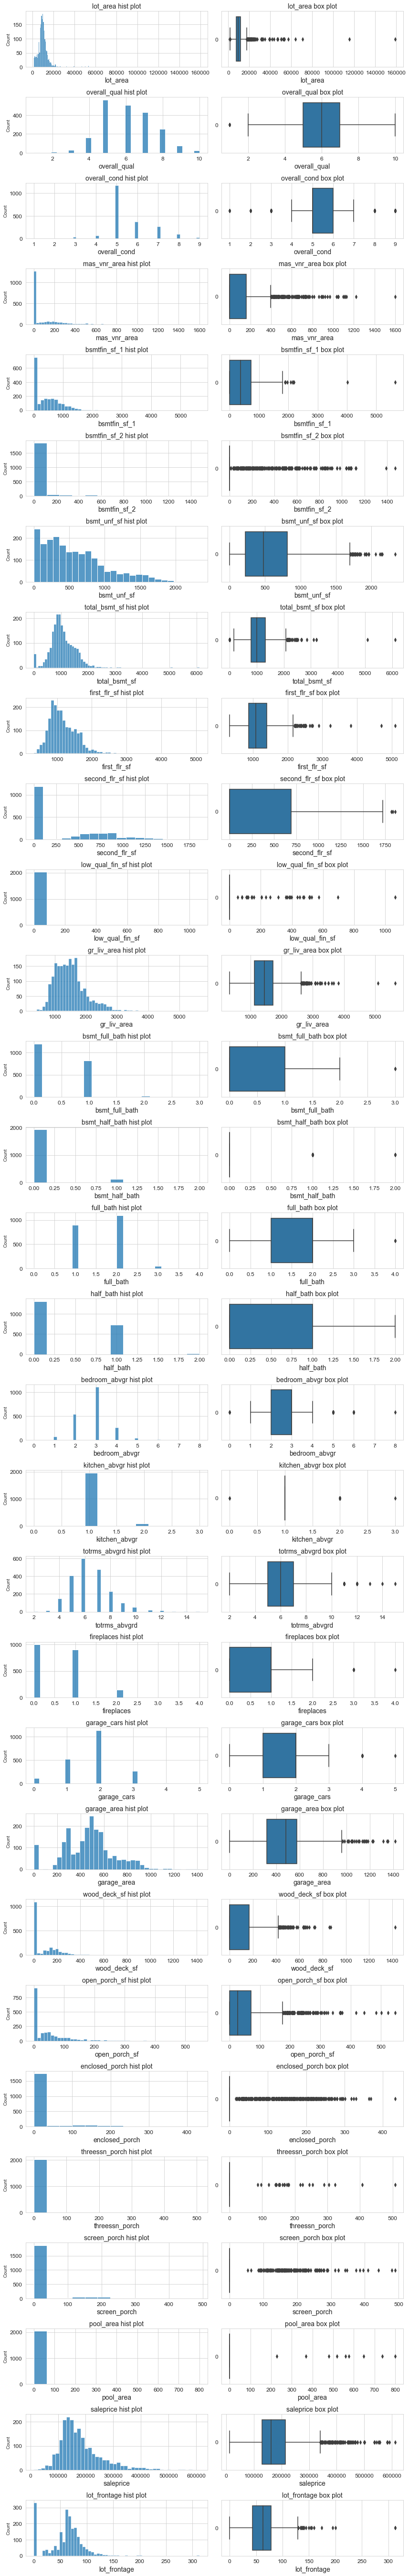

In [24]:
hist_custom(ames_train, num_cols)

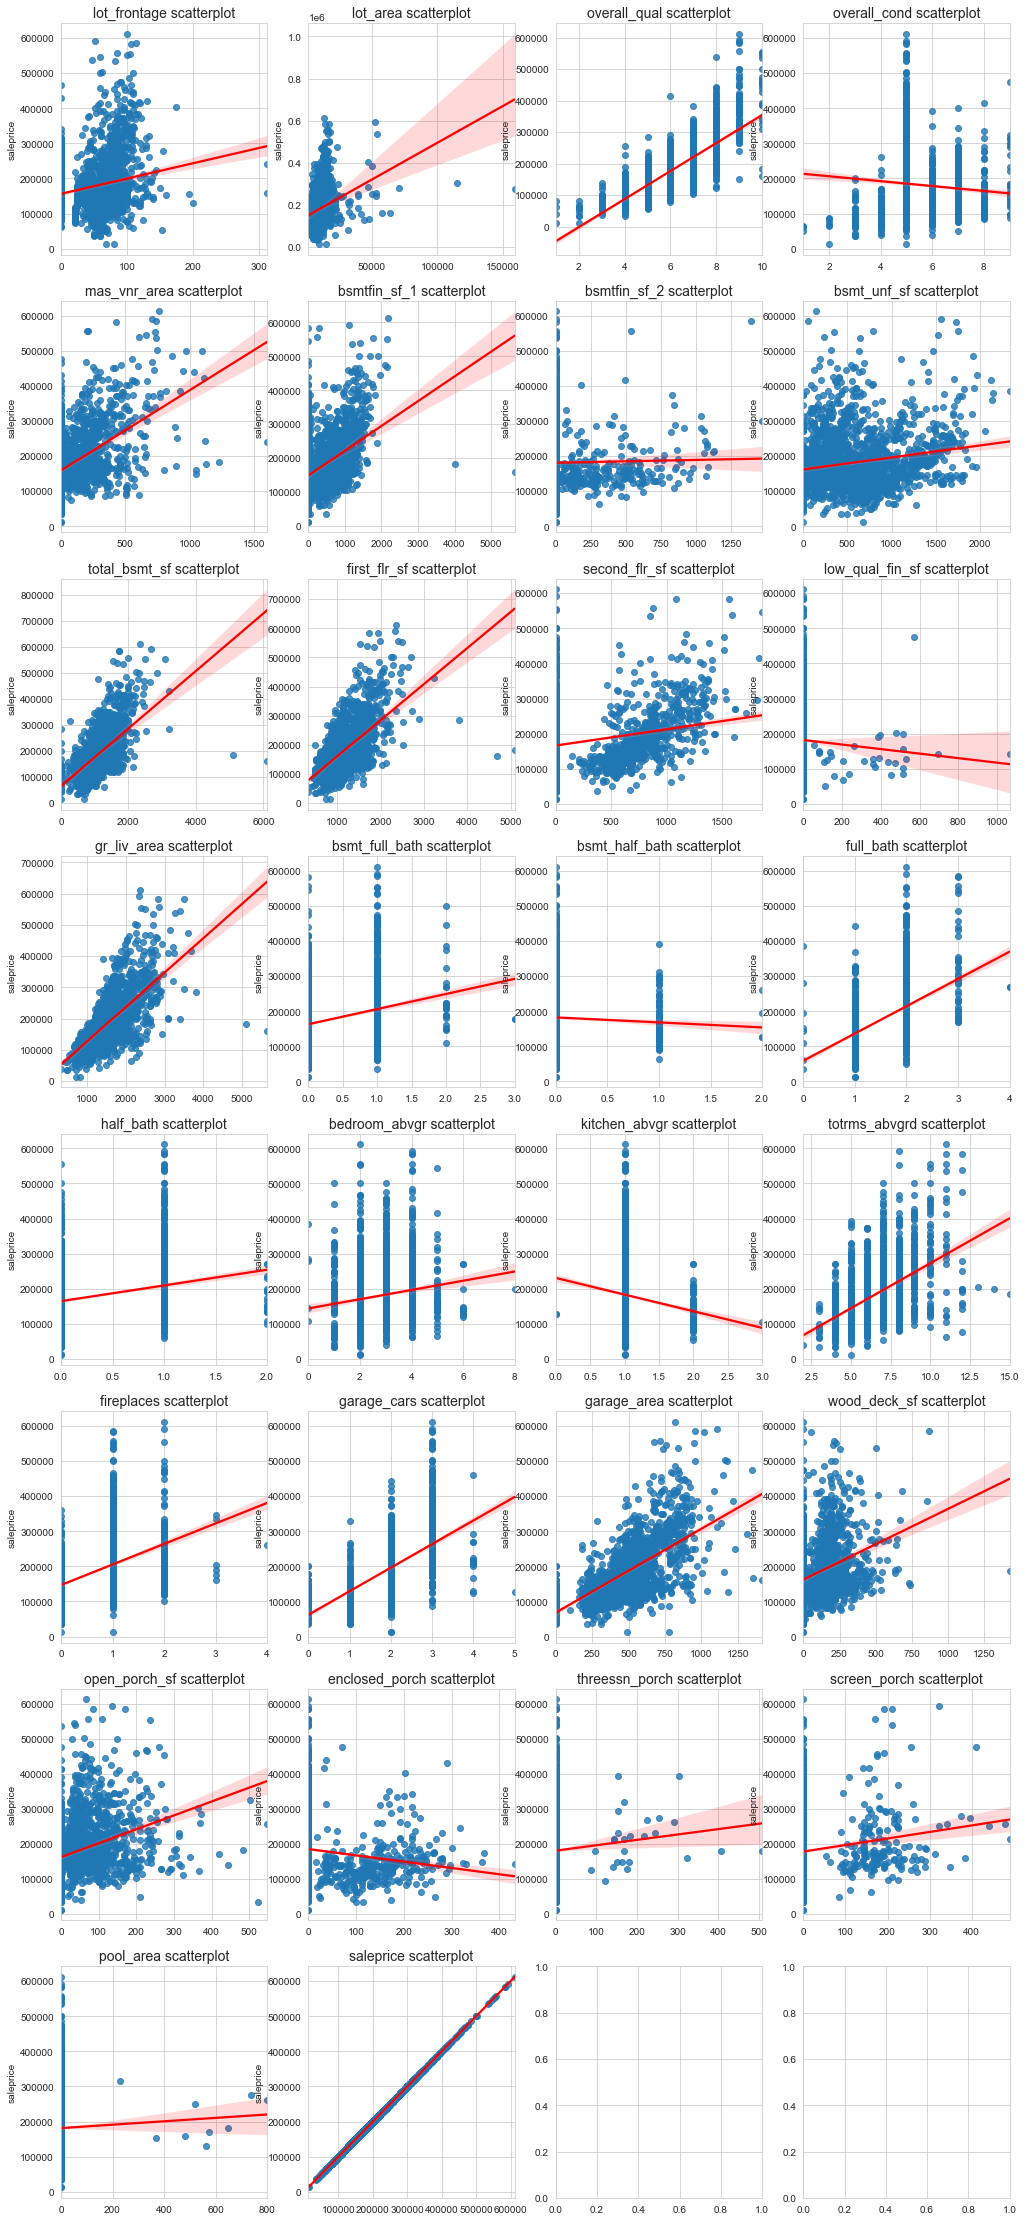

In [25]:
regplot_custom(ames_train, num_cols, "saleprice")

### Nominal Data
---

There are a total of 24 columns with nominal data. 

- Similar to the numerical data, there are several columns where more than 85% of the values are null values(e.g. alley, fence), or single values (e.g.street)
    - These columns do not contain enough variance to make useful predictions, and should be dropped.
---

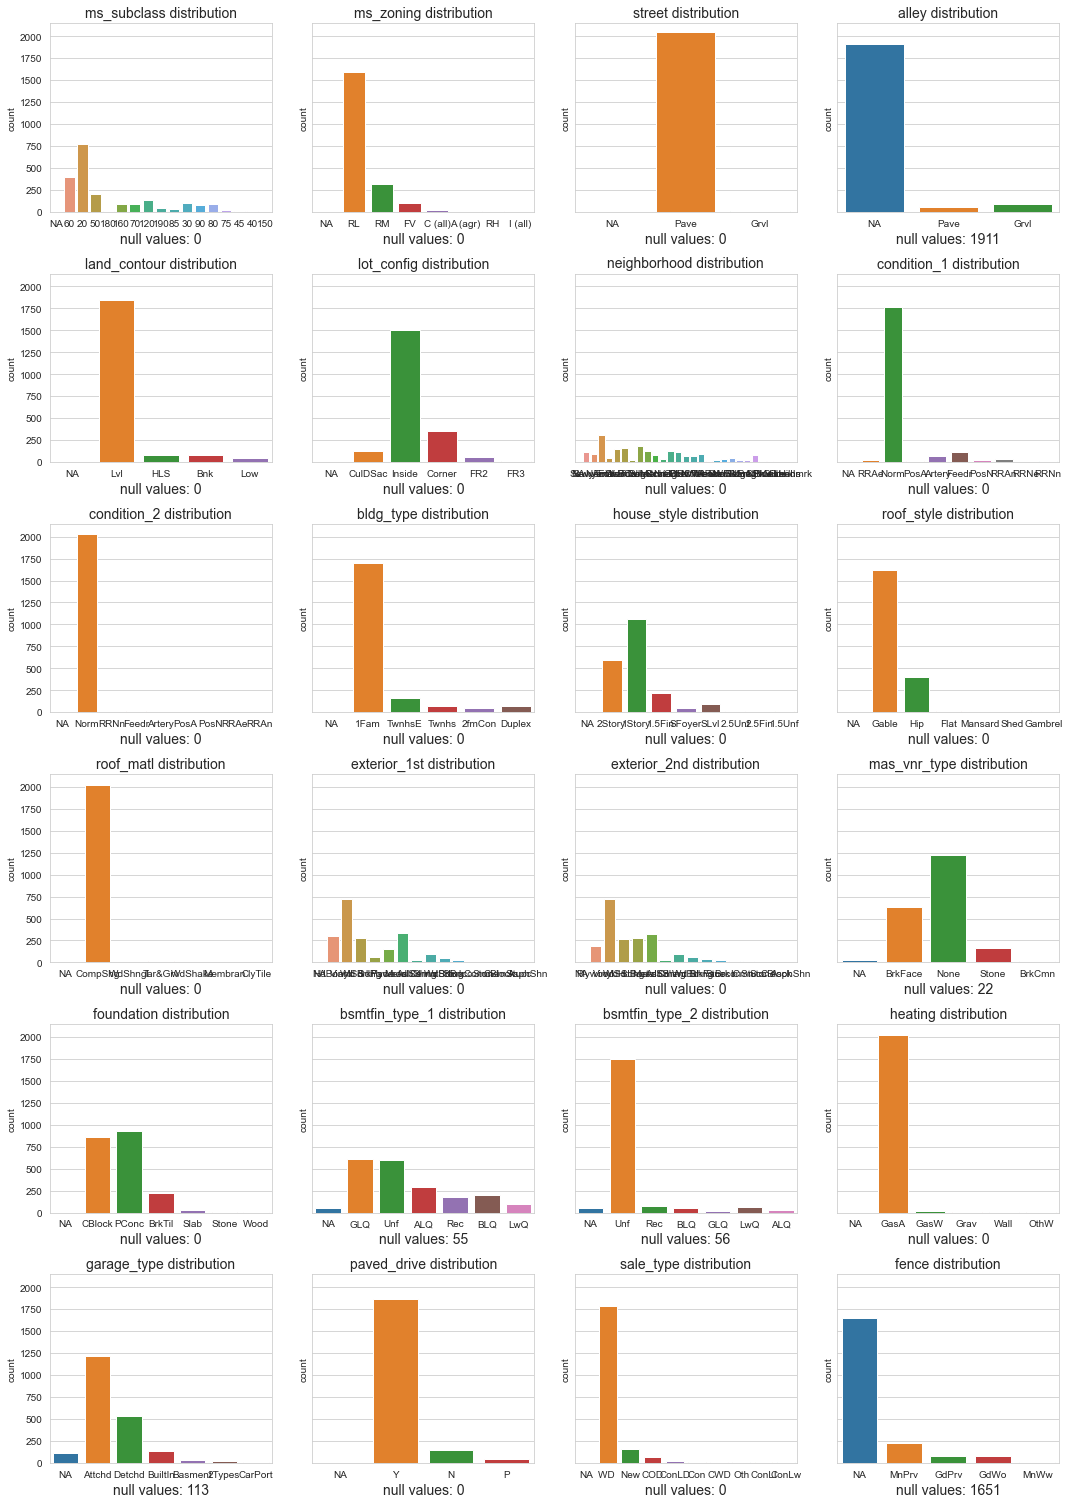

In [26]:
# creating frequency bar charts for each nominal column

# box plot, draw line

counts_custom(ames_train, cat_nom_cols)

### Ordinal Data
---

There are a total of 23 columns with numerical data. 

- As with the other two sets of data, there are several columns where more than 85% of the values are null values(e.g. pool_qc), or single values (e.g. electrical)
    - These columns do not contain enough variance to make useful predictions, and should be dropped.

- When comparing any columns with years (year_sold, year_built, garage_year_blt) to saleprices, the relationship looks to be more logarathmic than linear.
    - Further transformation might have to be made to these columsn for better model accuracy.

---

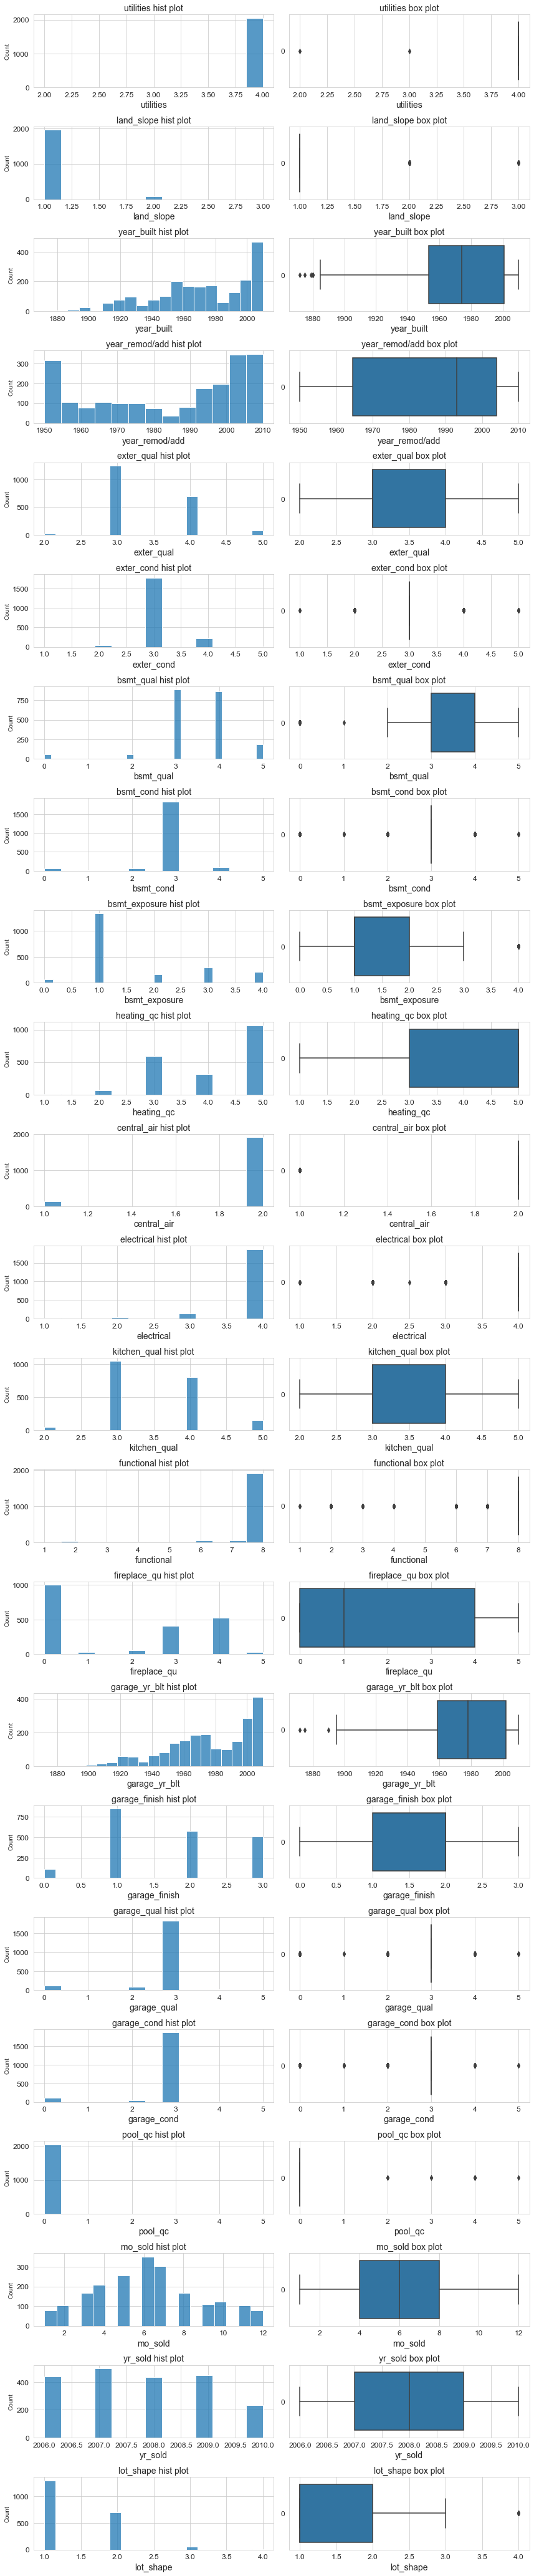

In [27]:
# Creating histogram and box plots for each ordinal column

hist_custom(ames_train, cat_ord_cols)

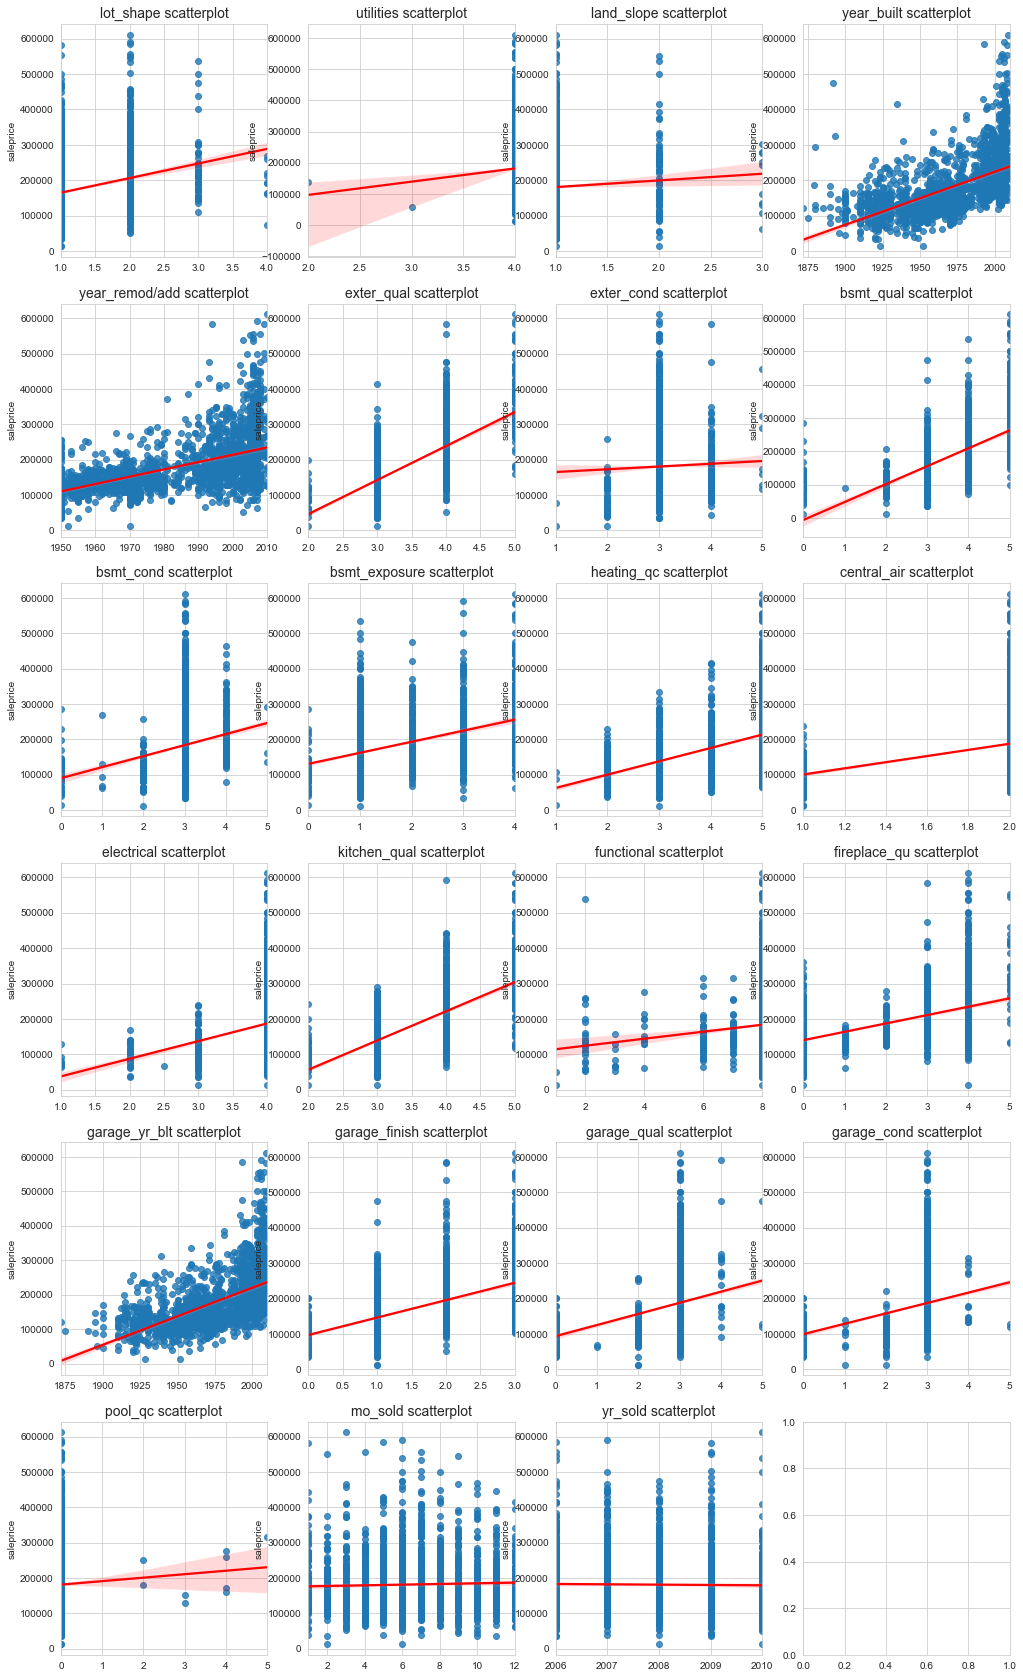

In [28]:
regplot_custom(ames_train, cat_ord_cols, "saleprice")

### Multicollinearity

---

- A heatmap of the features revealed several pairs that exhibit some collinearity:
    - garage_yr_blt and year_built
    - overall_qual, kitchen_qual and exter_qual
    - fireplaces and fireplace_qu
    - garage_cond and garage_qual
    - pool_area and pool_qc
    - garage_area and garage_cars
    

- These pairs will have to be further examined and dropped if needed

---

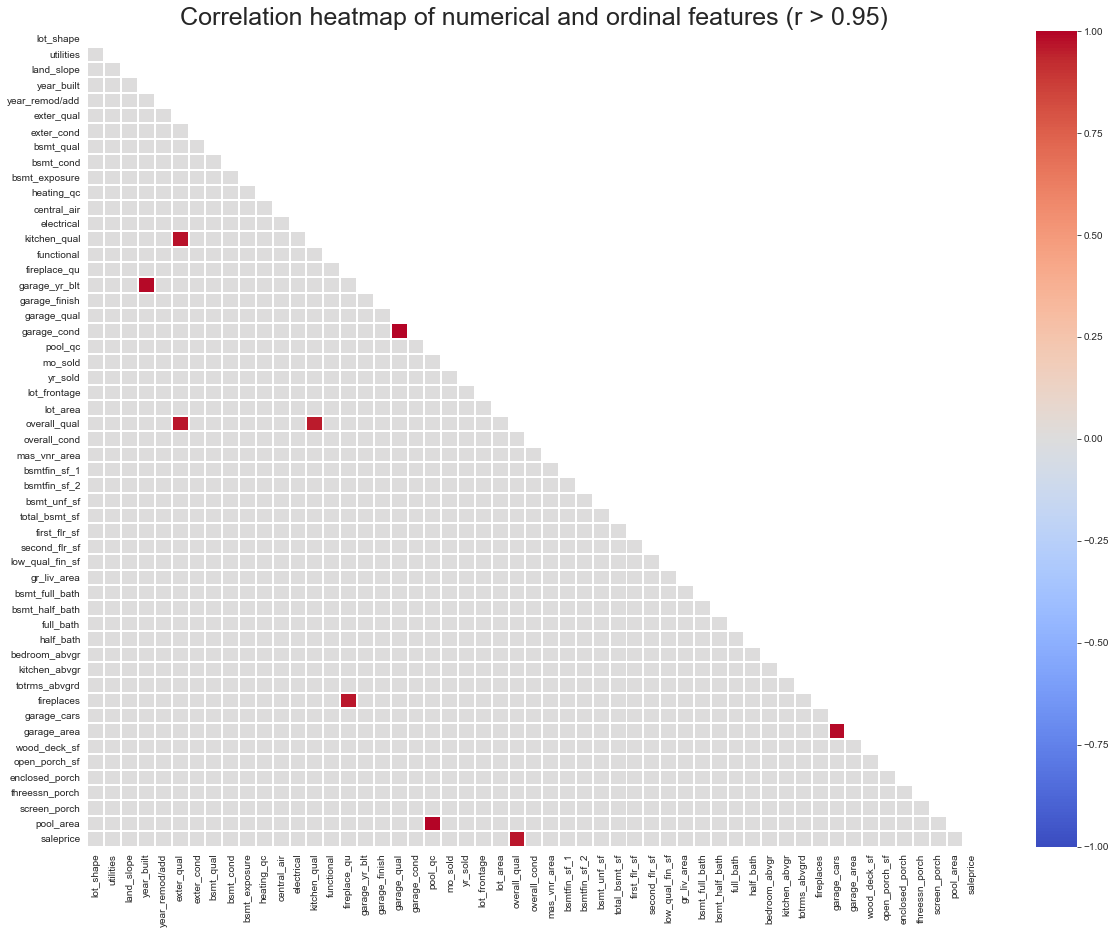

In [29]:
# Creating heatmap of numerical and categorical features

heatmap_custom(ames_train[cat_ord_cols+num_cols].corr(), "Correlation heatmap of numerical and ordinal features (r > 0.95)", cut = "y", cutoff = 0.95)

In [30]:
# Checking highest r2 scores for one-hot encoded nominal variables

dummy_noms = pd.get_dummies(ames_train[cat_nom_cols], drop_first = True)

dummy_noms["saleprice"] = ames_train["saleprice"]

dummy_noms.corr()['saleprice'].sort_values(ascending = False).head(10)

saleprice               1.000000
foundation_PConc        0.529047
bsmtfin_type_1_GLQ      0.463549
neighborhood_NridgHt    0.448647
sale_type_New           0.358102
garage_type_Attchd      0.357879
ms_subclass_60          0.355421
exterior_1st_VinylSd    0.342146
exterior_2nd_VinylSd    0.337563
mas_vnr_type_Stone      0.310026
Name: saleprice, dtype: float64

---